In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
product_category_name_translation = pd.read_csv("product_category_name_translation.csv")

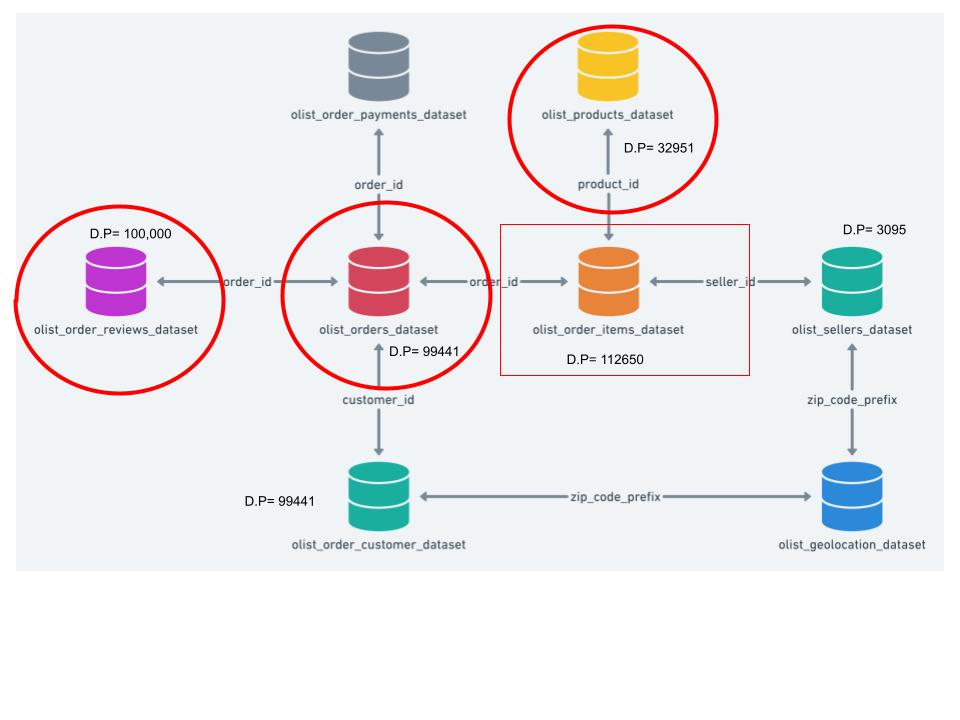

In [3]:
olist_merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_items_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_products_dataset, on="product_id", how = 'left')
olist_merge.drop_duplicates(subset=["review_score", "order_id"], inplace = True)
olist_merge = olist_merge.loc[(olist_merge["product_category_name"].notnull())]
olist_merge = olist_merge.loc[(olist_merge["order_status"]=="delivered")]

In [4]:
olist_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95312 entries, 0 to 114099
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       95312 non-null  object 
 1   customer_id                    95312 non-null  object 
 2   order_status                   95312 non-null  object 
 3   order_purchase_timestamp       95312 non-null  object 
 4   order_approved_at              95299 non-null  object 
 5   order_delivered_carrier_date   95310 non-null  object 
 6   order_delivered_customer_date  95304 non-null  object 
 7   order_estimated_delivery_date  95312 non-null  object 
 8   review_id                      95312 non-null  object 
 9   review_score                   95312 non-null  int64  
 10  review_comment_title           11251 non-null  object 
 11  review_comment_message         39068 non-null  object 
 12  review_creation_date           95312 non-null

In [5]:
dataAnalysis = pd.DataFrame(olist_merge[['review_score', 'price', 'product_category_name', 'freight_value','product_description_lenght', 'product_photos_qty']])

In [6]:
dataAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95312 entries, 0 to 114099
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   review_score                95312 non-null  int64  
 1   price                       95312 non-null  float64
 2   product_category_name       95312 non-null  object 
 3   freight_value               95312 non-null  float64
 4   product_description_lenght  95312 non-null  float64
 5   product_photos_qty          95312 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.1+ MB


In [7]:
dataAnalysis.describe()

,review_score,price,freight_value,product_description_lenght,product_photos_qty
count,95312.000000,95312.000000,95312.000000,95312.000000,95312.000000
mean,4.143046,125.328913,20.192252,793.048325,2.250378
std,1.295076,189.726202,15.824458,653.701051,1.746420
min,1.000000,0.850000,0.000000,4.000000,1.000000
25%,4.000000,41.800000,13.330000,348.000000,1.000000
50%,5.000000,79.000000,16.390000,606.000000,2.000000
75%,5.000000,139.900000,21.250000,995.000000,3.000000
max,5.000000,6735.000000,409.680000,3992.000000,20.000000


In [8]:
dataAnalysis["product_category_name"] = dataAnalysis['product_category_name'].astype('category')

<AxesSubplot:xlabel='review_score', ylabel='price'>

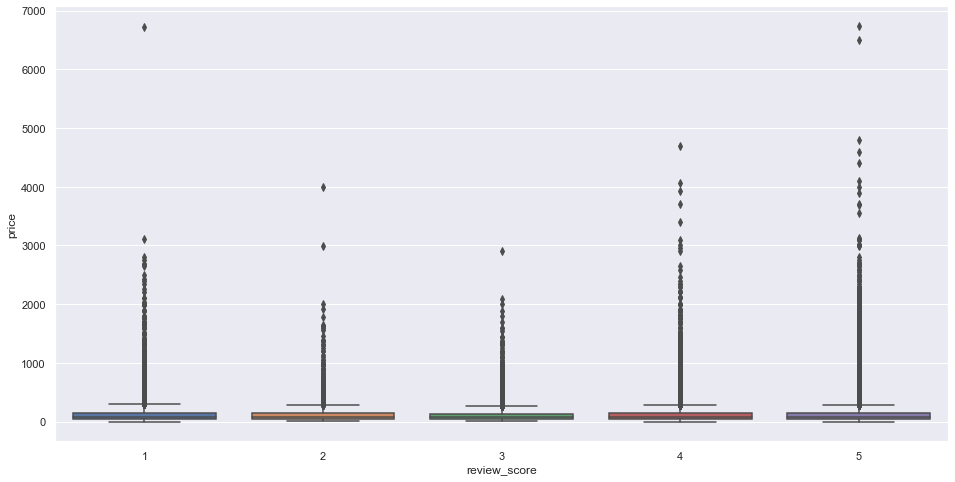

In [9]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'price', data = dataAnalysis)

<AxesSubplot:xlabel='review_score', ylabel='price'>

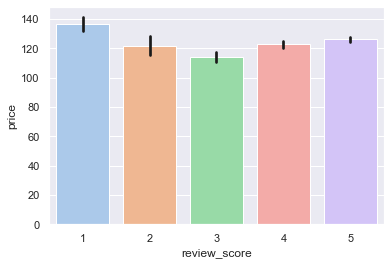

In [10]:
sb.barplot(x='review_score', y='price', data=olist_merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='product_description_lenght'>

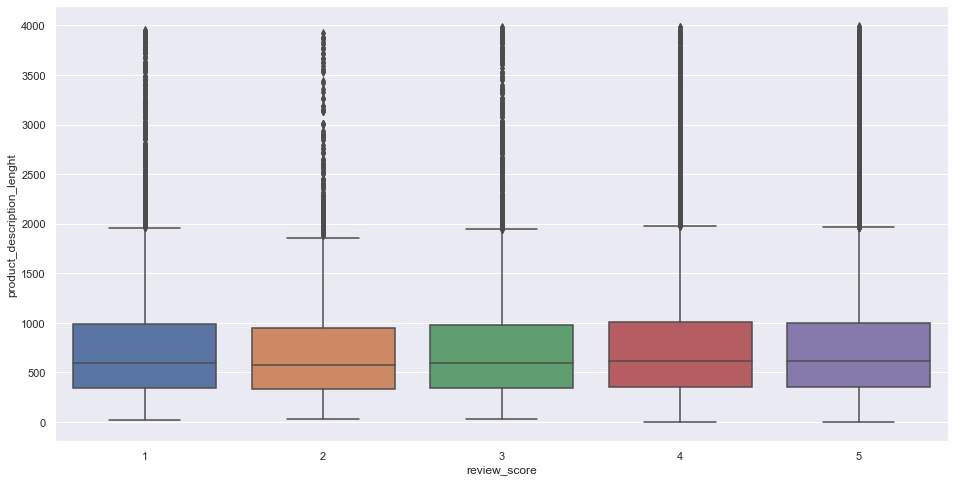

In [11]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'product_description_lenght', data = dataAnalysis)

<AxesSubplot:xlabel='review_score', ylabel='product_description_lenght'>

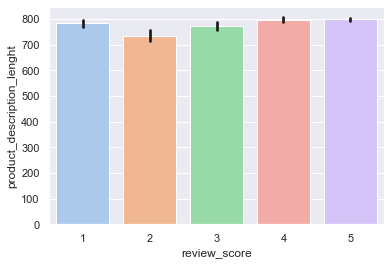

In [12]:
sb.barplot(x='review_score', y='product_description_lenght', data=olist_merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='review_score', ylabel='freight_value'>

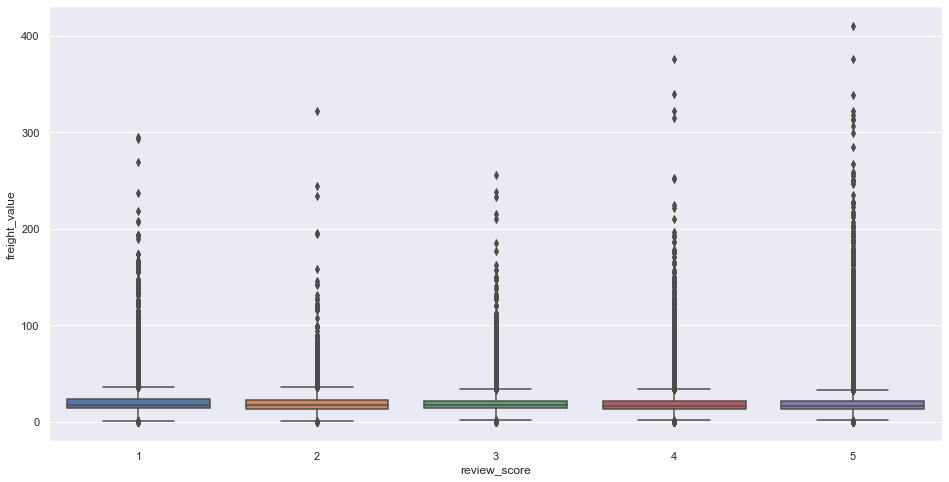

In [13]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'freight_value', data = dataAnalysis)

<AxesSubplot:xlabel='review_score', ylabel='freight_value'>

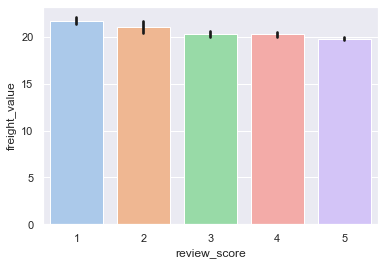

In [14]:
sb.barplot(x='review_score', y='freight_value', data=olist_merge, palette ="pastel" , errcolor='k')

<AxesSubplot:xlabel='product_category_name', ylabel='count'>

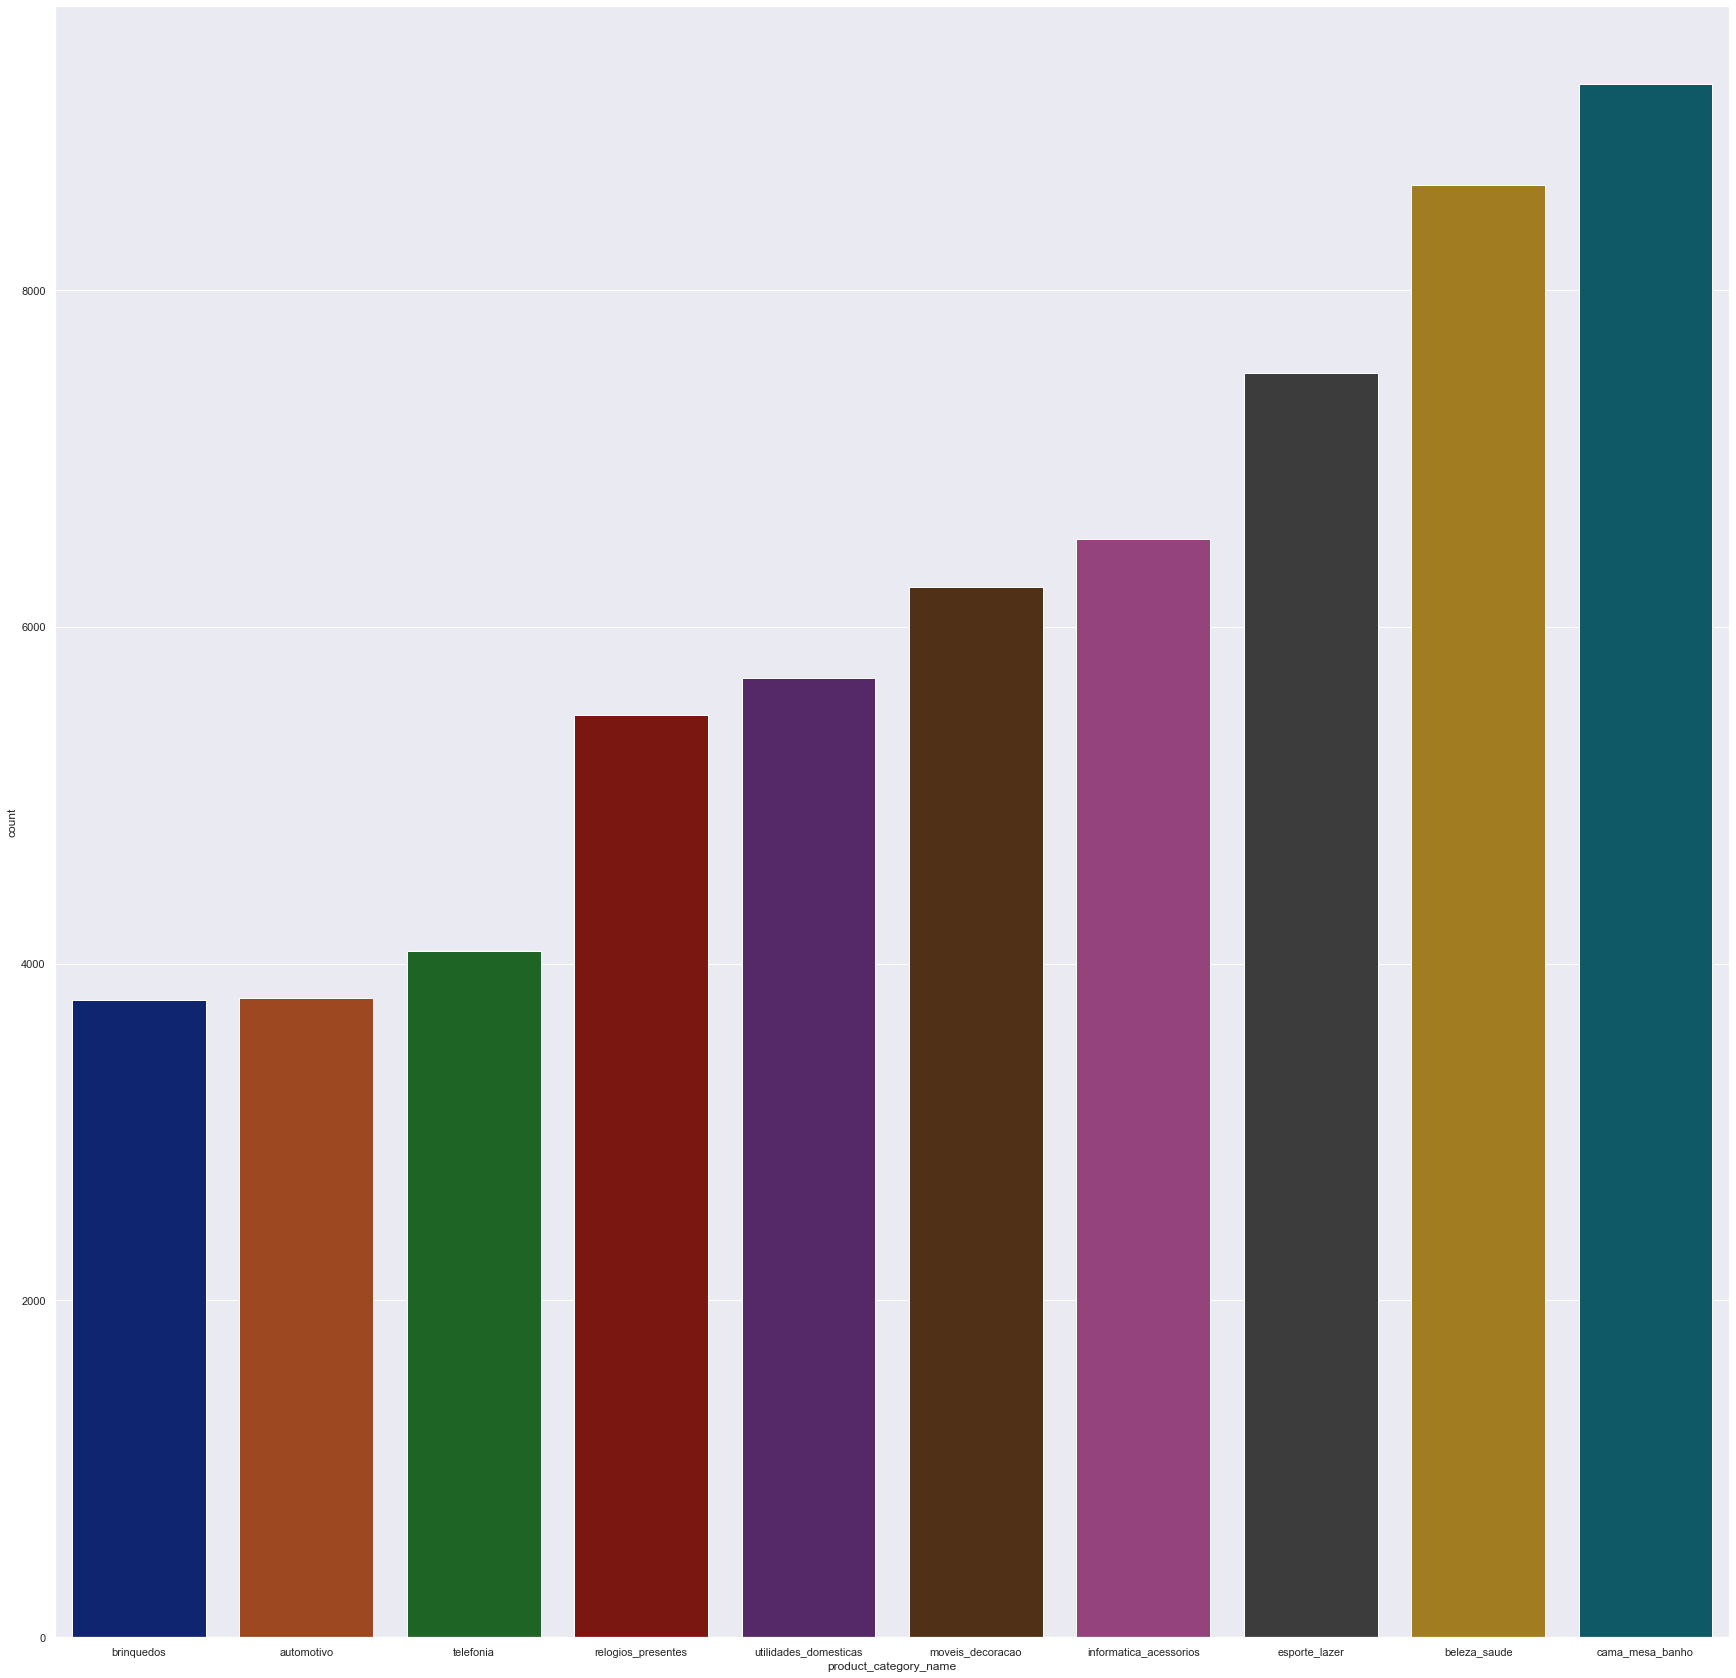

In [15]:
f = plt.figure(figsize=(30, 30))
sb.countplot(palette ="dark", data=dataAnalysis, x="product_category_name", order=dataAnalysis['product_category_name'].value_counts()[:10].sort_values().index)